# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the dataset

In [ ]:
# Connecting Google Colab and mounting 
from google.colab import drive
drive.mount('/content/drive')

# Reading the data from CSV files which is stored in google drive folder
data = pd.read_csv('/content/drive/MyDrive/PGP-DSBA/used_device_data.csv')



Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

In [ ]:
# displaying first 5 rows from the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [ ]:
#Checking number of rows and columns in dataset
data.shape


(3454, 15)

**Observation**

Given data frame has **3454 rows**/ovservations and **15 columns** or features

### Checking info of the given dataset

In [ ]:
# Using function - info() to print a summary of the DataFrame
# which shows the name, datatype of columns and non-null count
# also, shows memory usage of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations**

There are a total of 3454 rows and 15 columnsin the dataset.


* brand_name, os, 4g and 5g are categorical while all others are numerical data 
types
* Non-Null Count shows that main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have missing values
* normalized_used_price is the dependant variable

Memory usage is 404.9+ KB.

### Checking info of the dataset

In [ ]:
# describe() : Computes and displays a summary of statistics pertaining to the DataFrame columns
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Observations**

* There are 34 different brands, 4 different operating systems, 4gs or 5gs have either values yes or no .
* Anroid is the most popular os, with 3246 phones .
* Among 3454 entries, 2359 phones have 4g available and only 152 phones have 5g available.
* Mean values for screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, weight are larger than median values, indicating that data might be right-skewed.

* normalized_new_price and normalized_used_price are having almost close mean and median values indicating a almost normal distribution with mild right or left skewness

* The average values and median values are almost similar for amount of RAM in GB, indicating almost normal distribution.
* The average values of number of days for used phone is a bit less than median value, indicating data maybe skewed left

### Checking for duplicate data

In [ ]:
# Showing total number of duplicate data
data.duplicated().sum()

0

**Observations**

There is no duplicate data in the dataset

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`screen_size`**

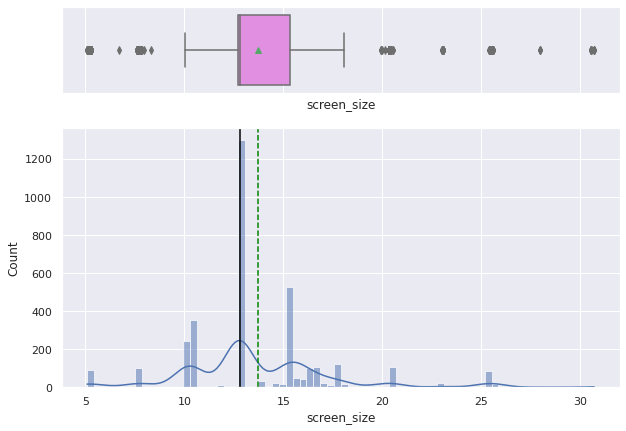

In [ ]:
histogram_boxplot(df, 'screen_size', kde=True)

**Observations:**
Dataset is highly right skewed with outliers at both sides indicating that there are few devices with bigger screen > 30 cm as well as few with smaller (5cm)screen size. The devices with bigger screens indicates that there are few tablets along with mobile phones.

**`main_camera_mp`**

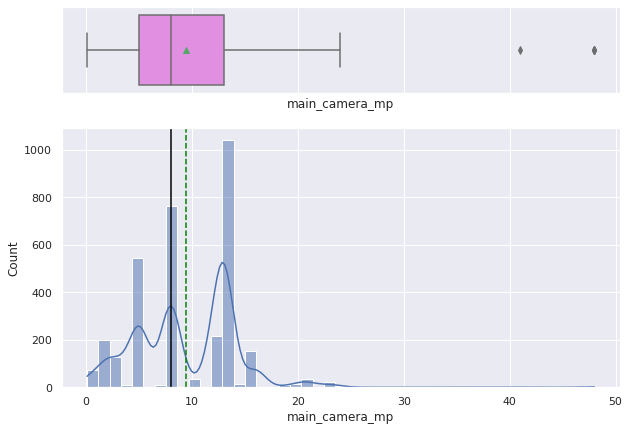

In [ ]:
histogram_boxplot(df,'main_camera_mp', kde=True)

**Observations:**
Dataset is right skewd with few outliers at right side.Most of main cameras are having 8 mp lense. There few main camera with quite high mp. 

**`selfie_camera_mp`**

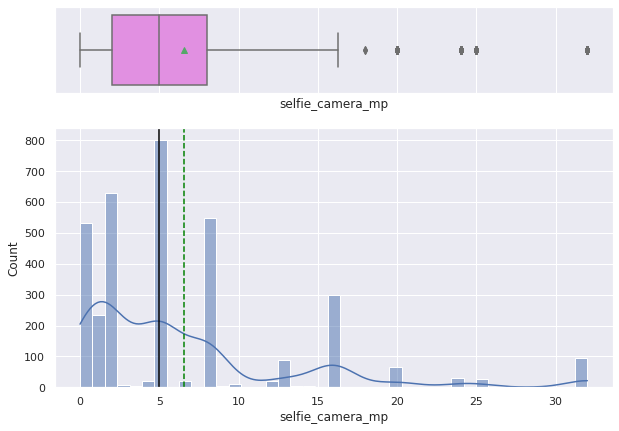

In [ ]:
histogram_boxplot(df,'selfie_camera_mp', kde=True)

**Observations:** 
selfie_camera_mp is almost simetric with long right whishker indicating that most of the selfie camera is 5 mp whereas there are few with high mp selfie camera.

 **`int_memory`**

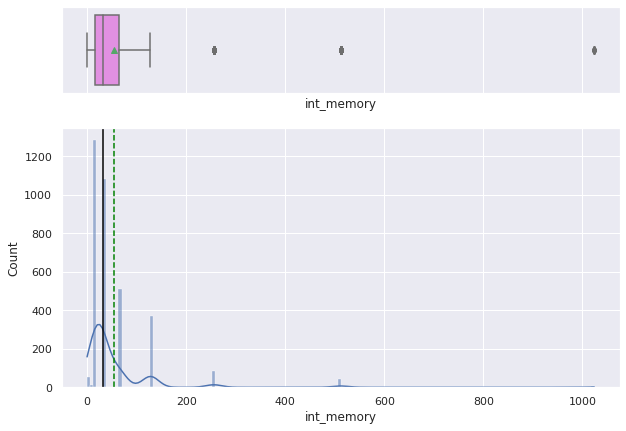

In [ ]:
histogram_boxplot(df,'int_memory', kde=True)

**Observations:** int_memory data is right skewed with few outliers at right side. The outliers signifies that there few phones in the dataset with high internal memory.

**`ram`**

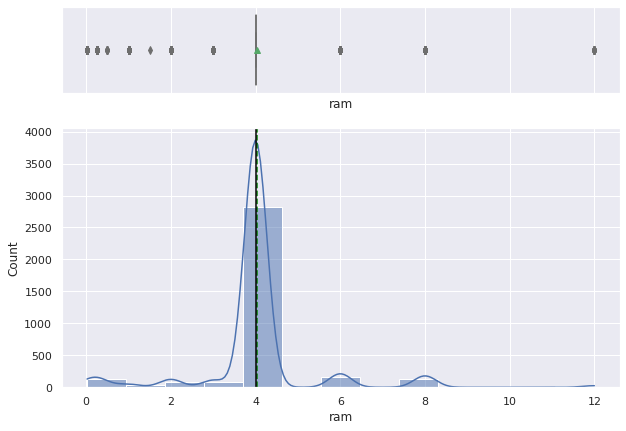

In [ ]:
histogram_boxplot(df,'ram', kde=True)

In [ ]:
df['ram'].describe()

count    3450.000000
mean        4.036122
std         1.365105
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64

**Observations:**
Ram has a normal distribution where most of ram size is 4gb. But there are outliers as low as .02 gb and as high as 12 gb ram

**`weight`**

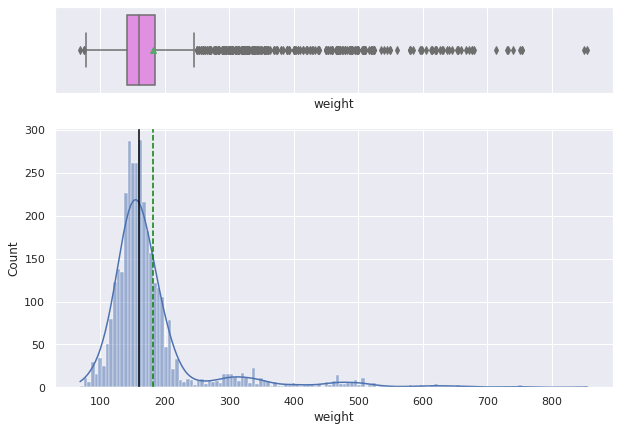

In [ ]:
histogram_boxplot(df,'weight', kde=True)

In [ ]:
df['weight'].describe()

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

**Observations:**
  - Data for mobile phone/tablet weight is right skewd with many outliers at right side indicating that there are quite a few devices with heavy weights.   
  - As we already know the dataset includes data for both phone and tablets, devices with heavy weights belong to tablets.
  - Average weight of mobile/tablet is 182.75, min is 69.0	but heaviest one is	855.0

**`battery`**

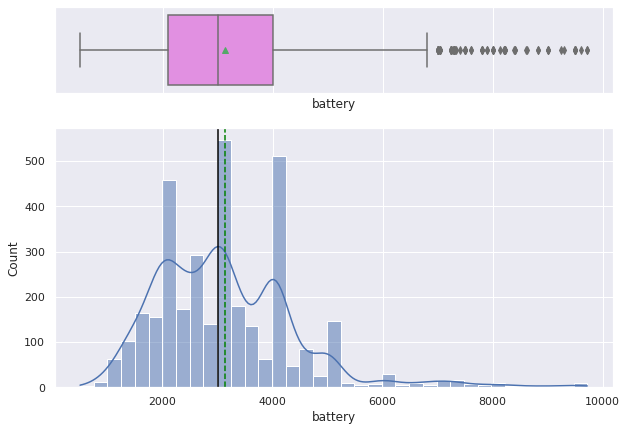

In [ ]:
histogram_boxplot(df,'battery', kde=True)

In [ ]:
df['battery'].describe()

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

**Observations :** 
 - data is right skewded with outliers
 - min size of battery is 500 mah and max is 9720 mah whereas avg is 3133 mah

 **`days_used`**

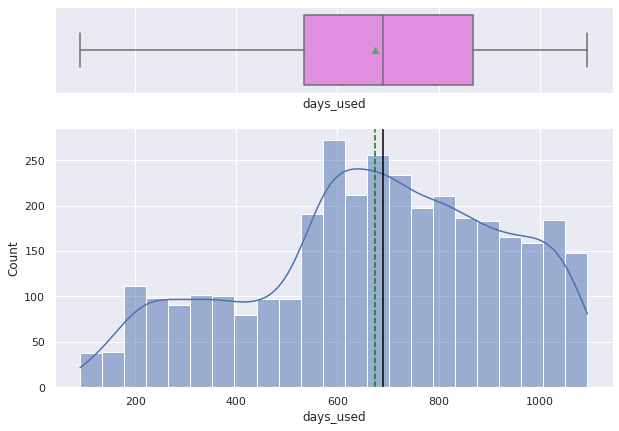

In [ ]:
histogram_boxplot(df,'days_used', kde=True)

In [ ]:
df['days_used'].describe()

count    3454.000000
mean      674.869716
std       248.580166
min        91.000000
25%       533.500000
50%       690.500000
75%       868.750000
max      1094.000000
Name: days_used, dtype: float64

**Observations:** 
* Data is left skewded without any outliers. 
* Average days of used is 675 days whereas median value is around 691 days

**`normalized_new_price`**

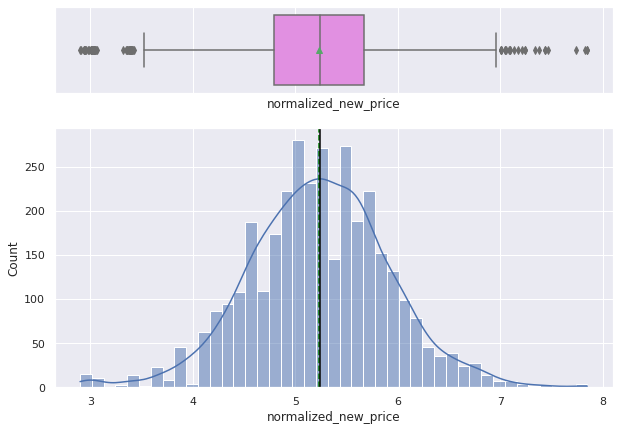

In [ ]:
histogram_boxplot(df,'normalized_new_price', kde=True) 

In [ ]:
df['normalized_new_price'].describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

**Observations:**

* The above diagrams show that normalized_new_price data has a normal distribution with few outliers.
* Average price of new phone is 5.23 euros and median value is 5.25 euros
* Lowest price of new phone is 2.9 euros and highest is 8.85 euros

**Q1. What does the distribution of normalized used device prices look like?**

**`normalized_used_price`**

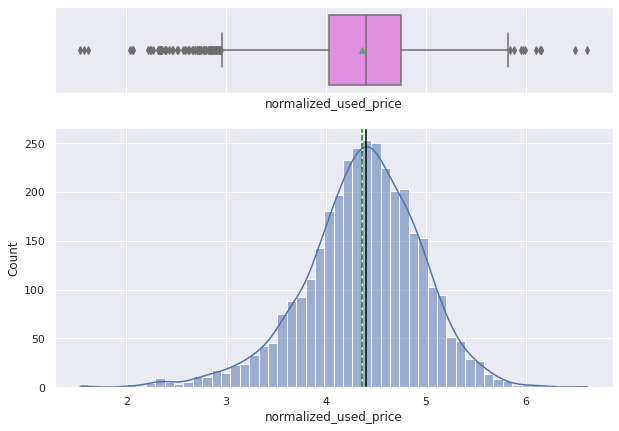

In [ ]:
histogram_boxplot(df, "normalized_used_price" , kde=True)

In [ ]:
df['normalized_used_price'].describe()

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64

**Observations:**
* From the above plot we can conclude that normalized_used_price has normal distribution with some outliers at lower and higher sides.
* Average used price of the refubrished phone/tablet is 4.36 euros

So, from the above diagram here it shows that normalized_used_price has a normal distribution. Average used_price of the refubrished mobile phone/tablet is 4.36 euros. But there are few phone as low as 1.53 euros and as high as 6.61 euros also. 

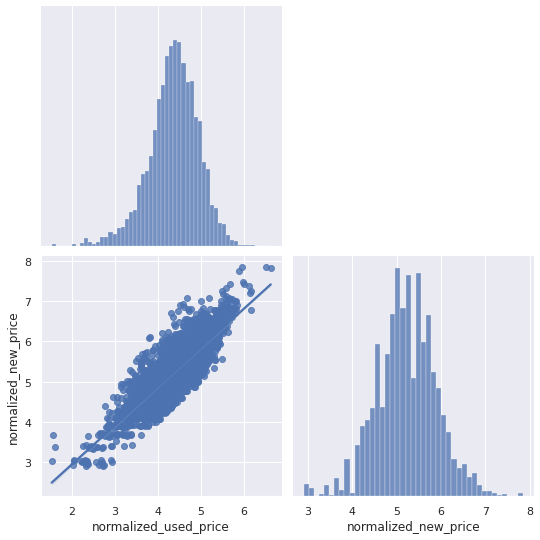

Linear correlation factor between normalized_used_price and normalized_new_price 0.83


In [ ]:
price_plot = sns.pairplot(data = df[["normalized_used_price","normalized_new_price"]], corner=True, kind="reg")
price_plot.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between normalized_used_price and normalized_new_price", \
      round(df.corr()["normalized_used_price"]["normalized_new_price"] , 2))


**Observations:**

normalized_new_price and normalized_old_price are strongly correlated with a correlation factor of 0.83

**`brand_name`**

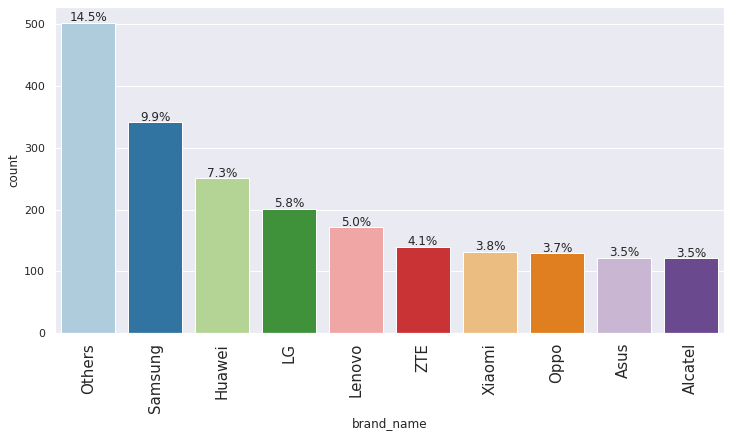

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**Observations :**

* Samsung is the top phone brand with 9.9% of refubrished phones. Next is Huawei (7.3%) and LG (5.8%). 
* Asus and Alcatel are having lowest percentage of refubrished devices (3.5%)

**`os`**

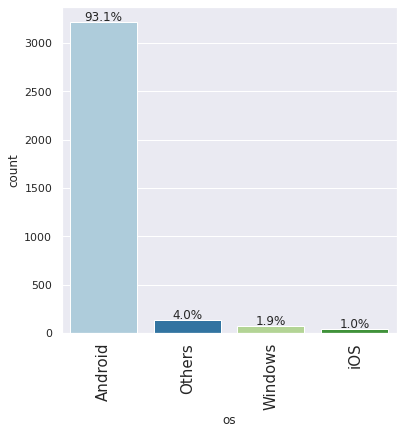

In [ ]:
labeled_barplot(df, "os", perc=True)

In [ ]:
df["os"].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

**Observations:**
 * There 3214 used phones/tablets which 93.1% which has android os
 * 67 phones (1.9%) have windows and 36 (1%) iOS.
 * Other os is 137 (4%)

**Q2. What percentage of the used device market is dominated by Android devices?**

**Observations:**

* Android is the most popular os in the used device market  ~ 93.1%
* Others = ~4%
* Windows = ~1.9%
* iOS = ~1%



**`4g`**

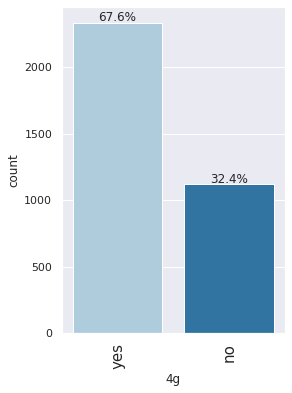

In [ ]:
labeled_barplot(df, "4g", perc=True)

Observations:
* 67.6 % of the refubrished phones/tablets are 4g enabled
* 32.4% phones are not 4g enabled

**`5g`**

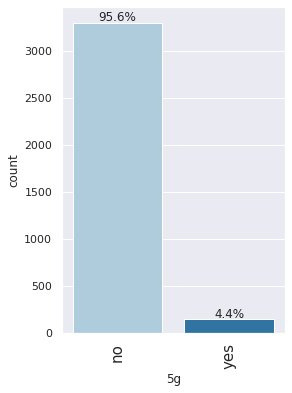

In [ ]:
labeled_barplot(df, "5g", perc=True)

**Observations**:

* Majority of the phones/tablets are not 5g enabled ~ 95.6%

* only 4.4% of refubrished phones are 5g enabled.

**`release_year`**

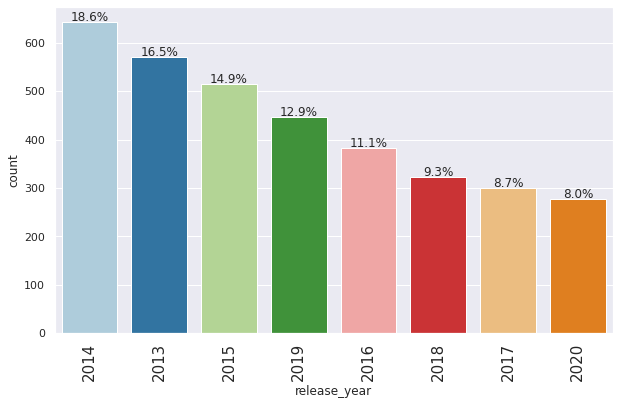

In [ ]:
labeled_barplot(df, "release_year", perc=True)

**Observations**:
* Number of used phones/tablets are getting decreasing with years.
* Recent the release year is lesser the percentage of refubrished phone.
* Oldest release year is 2014 which has highest 18.6% of phones. Latest year 2020 has lowst 8% of the total reused phones.

### Bivariate Analysis

In [ ]:
data.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


**Q3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

**Distribution of RAM for different manufacturing brands**

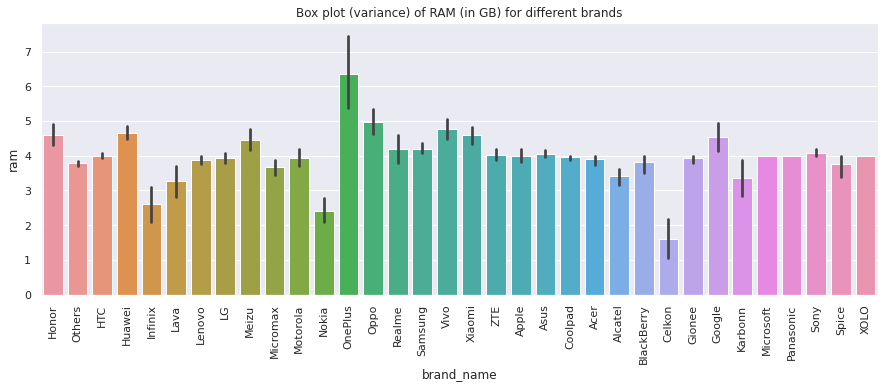

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.title("Box plot (variance) of RAM (in GB) for different brands")

plt.show()

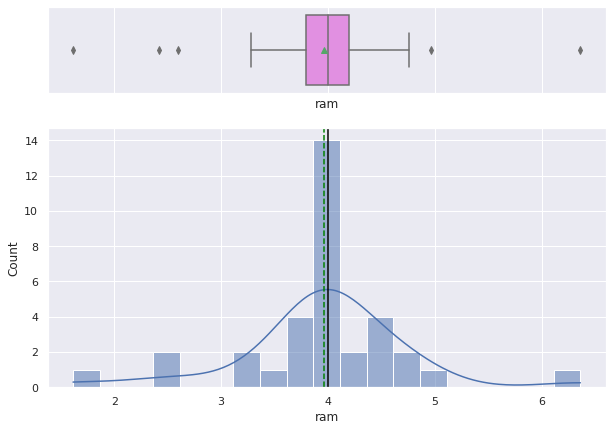

In [ ]:
#dataframe with avg ram size for brands
df_ram = pd.DataFrame(df.groupby(['brand_name'])['ram'].mean())
#df_ram
histogram_boxplot(df_ram, 'ram', kde=True)

In [ ]:
df_ram.describe()

,ram
count,34.000000
mean,3.962049
std,0.787467
min,1.613636
25%,3.790803
50%,4.000000
75%,4.198341
max,6.363636


**Observations:**


* Size of RAM over different brands are normally distributed
* Average size of RAM is 4 GB
* There are few outliers over the normal ranges. OnePlus is the brand with highest 6.36 gb RAM and Celkon has lowest 1.6 gb ram.

**Q4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**


**Relation between a phone's weight and large batteries ( > 4500 mAh)**

In [ ]:
#Creating dataframe with phone/tablets witg batter >4500 mAh
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

* There are 341 refurbished phones with large batteries (i.e. >4500 mAh)

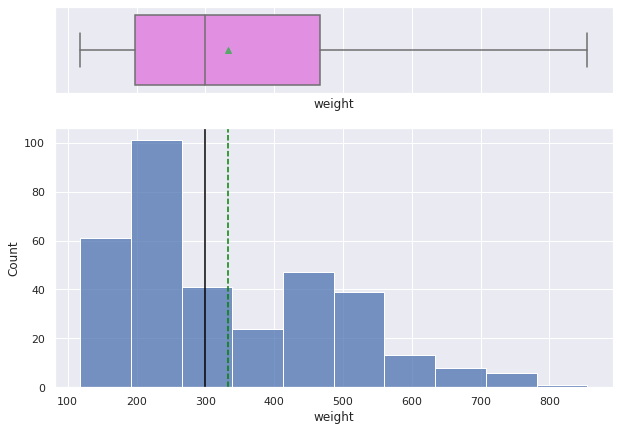

In [ ]:
histogram_boxplot(df_large_battery, "weight")

In [ ]:
df_large_battery['weight'].describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

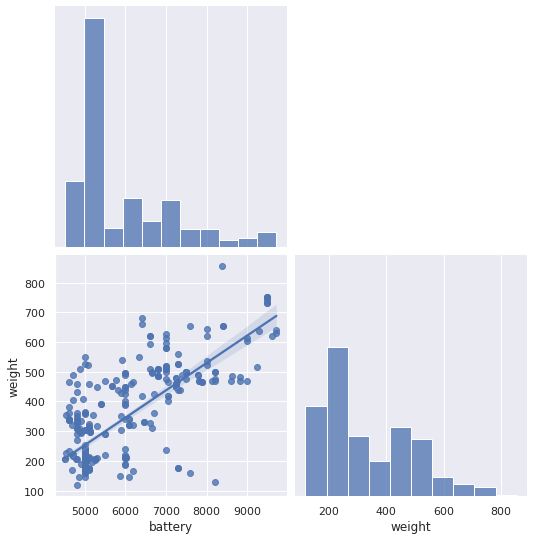

Linear correlation factor between phone's weight and battery 0.76


In [ ]:
g = sns.pairplot(data = df_large_battery[["battery","weight"]], corner = True, kind = "reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_large_battery.corr()["weight"]["battery"] , 2))

**Observations**
* We observe from the above plots that phone's weight and battery are positively correlated (.76)
* The weight for phones with large batteries seems to  have right-skewed distribution.
* Average weighr of phone with large batteries is 332.27 gm. Lowest weight is 118 gm and highest is 855 gm for phones with large batteries ( > 4500 mAh).
* Median phone weight is about 300 gm.
* Also, we need to keep in mind that there are phones and as well as tablets. So, weight and bettery might be heavier for tablets than phones.


**Q5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

**Distribution of large screen over different brands**

In [ ]:
# 6 inch = 6 * 2.54 cm
#Filtering out the dataset with screen size > 6 inches
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

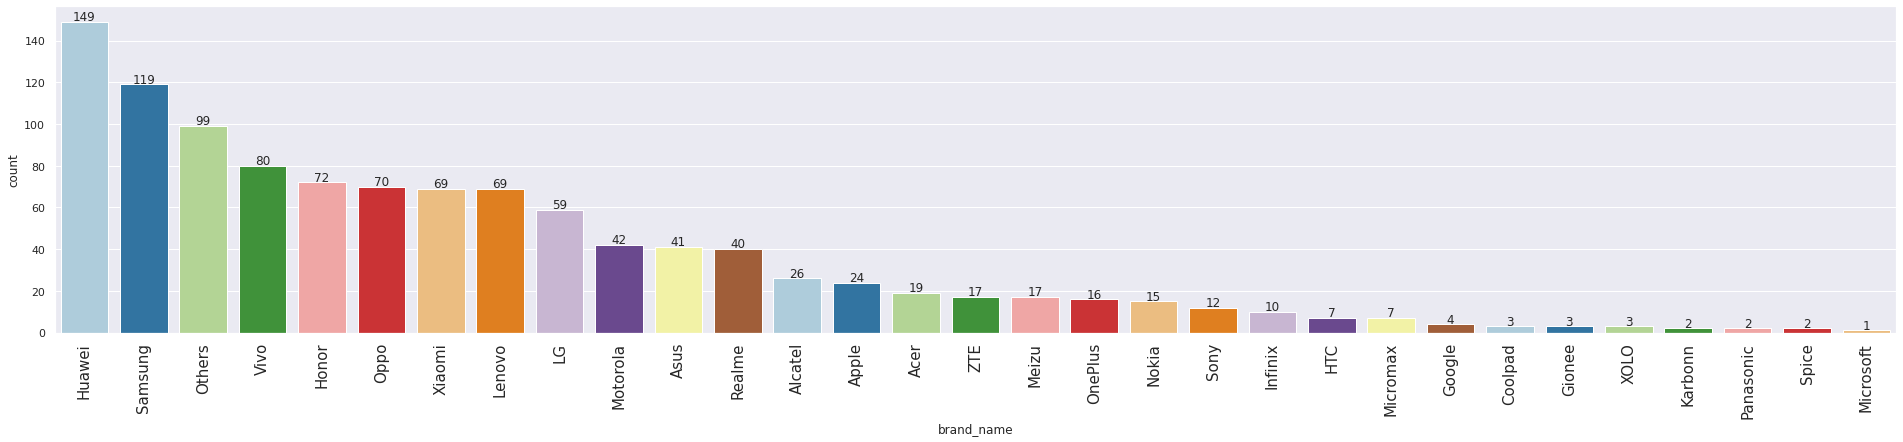

In [ ]:
labeled_barplot(df_large_screen  , 'brand_name')

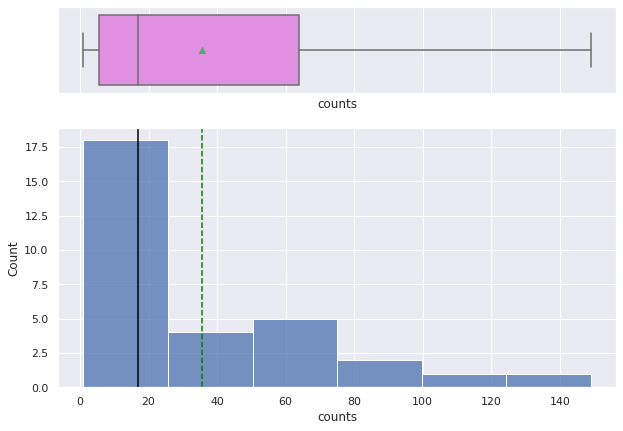

In [ ]:
# Number of phones with large screen over different brands
df_large_screen_counts = pd.DataFrame(df_large_screen.groupby(['brand_name'])['screen_size'].count())

df_val_counts = pd.DataFrame(df_large_screen_counts)
df_value_counts_reset = df_val_counts.reset_index()
# Setting dataframe columns 
df_value_counts_reset.columns = ['brand_name', 'counts'] 
histogram_boxplot(df_value_counts_reset, "counts")

In [ ]:
df_value_counts_reset['counts'].describe()

count     31.000000
mean      35.451613
std       38.645257
min        1.000000
25%        5.500000
50%       17.000000
75%       64.000000
max      149.000000
Name: counts, dtype: float64

**Observations**

* There are total 1099 phones or tablets with large screen size. Average number of phones or tablets across brands with a screen size > 6 inches is about 36 phones per brand.
* Number of phone/tablets with large screen size is seems to have righr skewed distribution. 
* Huwaei has maximum number of phones/tablets with screen size > 6 inches , 149 counts.
* We need to keep in mind that screen size is significantly different for a tablet than phone. So, extreme large values for screen size are coming from tablet data which is justified and real.


**Q6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
#Filtering out the dataset with selfie camera > 8 mp
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

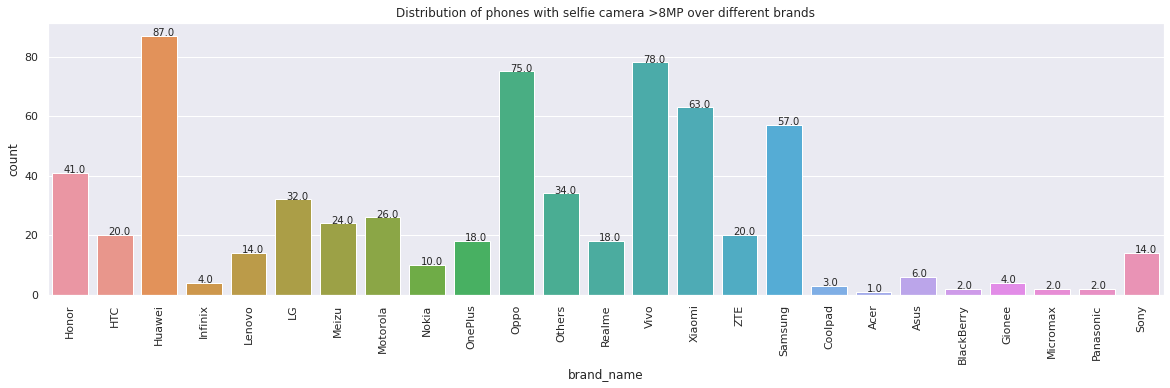

In [ ]:
# Counting number of phones with selfie cam > 8 mp for each brands.
df_8mp_selfie_counts = pd.DataFrame(df_selfie_camera.groupby(['brand_name'])['selfie_camera_mp'].count())
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.title("Distribution of phones with selfie camera >8MP over different brands")
ax = sns.countplot( data= df_selfie_camera, x = "brand_name");
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observations:**
* There are total 655 phones with selfie camera more 8 MP
* The brands which has most number of phone with selfie cam greater that 8MP are - Huawei (87 counts) , Vivo (78 counts), Oppo (75 counts)
* Acer, Blackberry, Micromax, Panasonic are the brands with lowest number (less than or equals 2 counts) of rebubrished phone with great selfie camera.  



**Price of used devices varies across the years.**

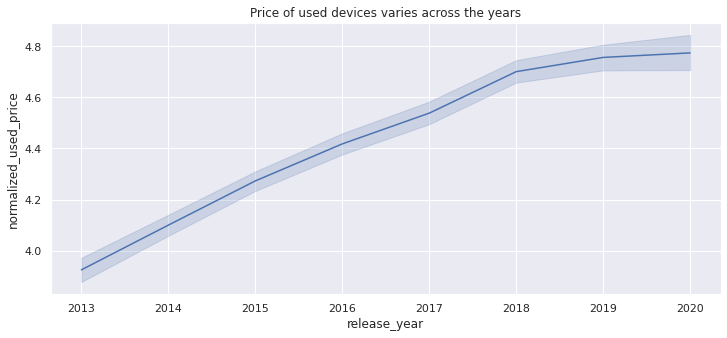

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot( data = df, x='release_year', y='normalized_used_price') ## lineplot for release year and used price
plt.title('Price of used devices varies across the years')

plt.show()

**Observations:**
From the above plot , it shows that price of used phone has increased over the years

**Prices for used phones and tablets offering 4G and 5G networks**

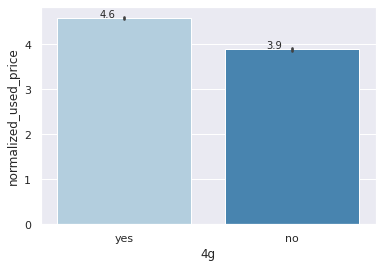

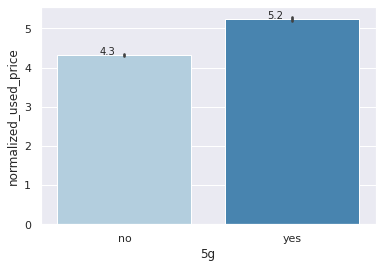

In [ ]:
ax = sns.barplot(x = '4g',
            y = 'normalized_used_price',
            data = df,
            palette = "Blues");
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

ax = sns.barplot(x = '5g',
            y = 'normalized_used_price',
            data = df,
            palette = "Blues");
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observations:**

 * Average price for Used phone with 4g network is more costlier than which are not 4g enabled
 * Average price for 5g enabled used phone are more costly than which are not.
 * Also, 5g enabled used phone or tablets are more costly that 4g enabled used devices

**Correlation Check**

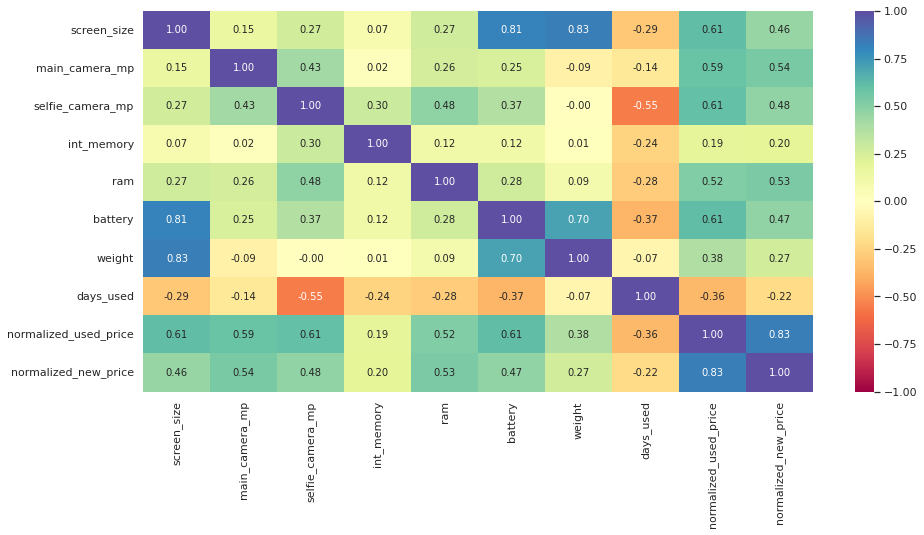

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Top positively correlated attributes:**
* normalized_new_price & normalized_used_price = 0.83
* screen size and weight = 0.83
* screen size & battery = 0.81
* weight & battery = 0.70

**Top negatively correlated attributes:**
* days_used & selfie_camera_mp = -0.55
* days_used & battery = -0.37
* days used & normalized_used_price = -0.36


**Q.7 Which attributes are highly correlated with the normalized price of a used device?**

* normalized_used_price and normalized_new_price are negatively correlated with days_used (-0.36 , -0.22)
* normalized_used_price and normalized_new_price are strongly-positively correlated (0.83 )
* normalized_used_price and normalized_new_price are moderately-positively correlated with selfie_camera_mp, main_camera _mp, screen_size, battery and weight

**normalized_used_price vs days_used**

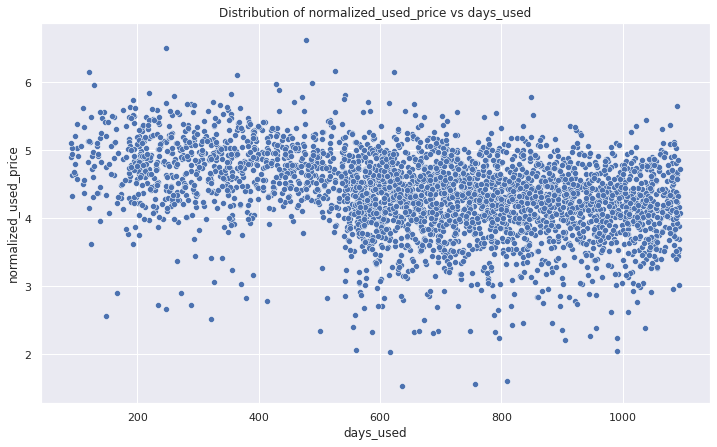

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="days_used", y="normalized_used_price");
plt.title("Distribution of normalized_used_price vs days_used")
plt.show()

**Observations:**

 - A mild negative trend is apparent and confirmed by the correlation heatmap.


**normalized_new_price vs normalized_used_price**

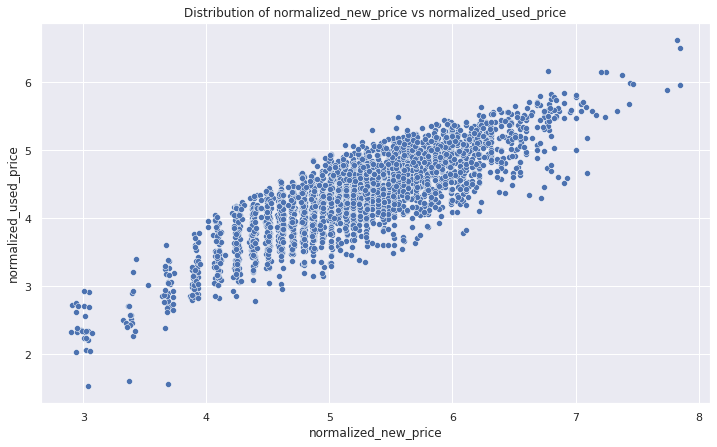

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="normalized_new_price", y="normalized_used_price");
plt.title("Distribution of normalized_new_price vs normalized_used_price")
plt.show()

**Observations**

The higher normalized new price is, normalized used price increases. There is strong positive linear relationship observed.


**normalized_used_price vs ram**

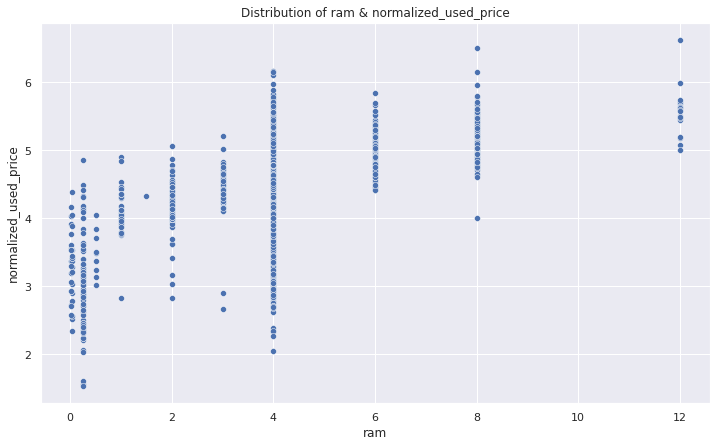

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df,  x="ram", y="normalized_used_price",);
plt.title("Distribution of ram & normalized_used_price")
plt.show()

**Observation :**

RAM is a categorical variable. However, above scattered plot indicates that normalized_used_price increases as ram size increases. Most of the ram are of size 4gb.

**normalized_used_price vs main/selfie_camera_mp**

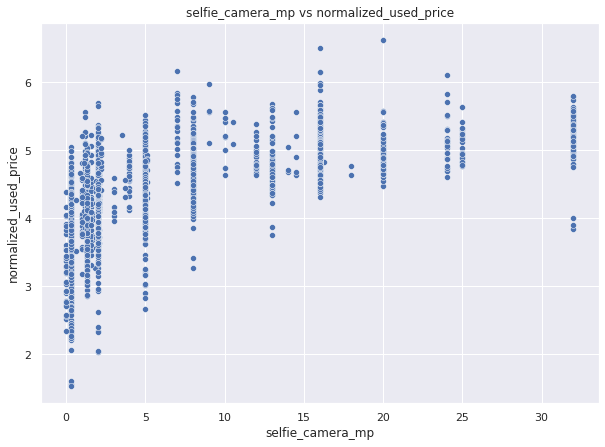

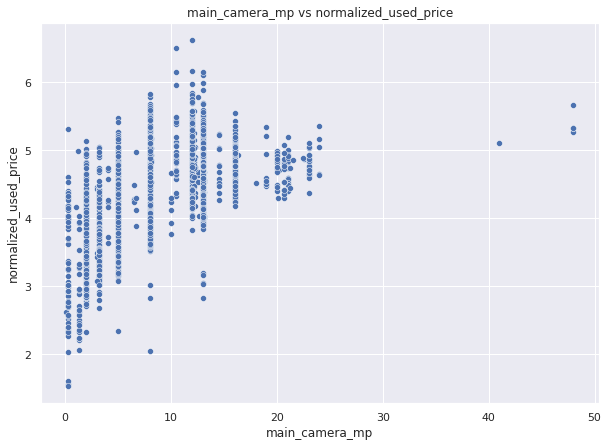

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('selfie_camera_mp vs normalized_used_price')
sns.scatterplot(data=data, x="selfie_camera_mp", y="normalized_used_price")
plt.show()
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x="main_camera_mp", y="normalized_used_price")
plt.title('main_camera_mp vs normalized_used_price')
plt.show()

**Observations:**
 As megapixel increases for both selfie and main camera , normalized used price also increase.

**normalized_used_price vs release_year**

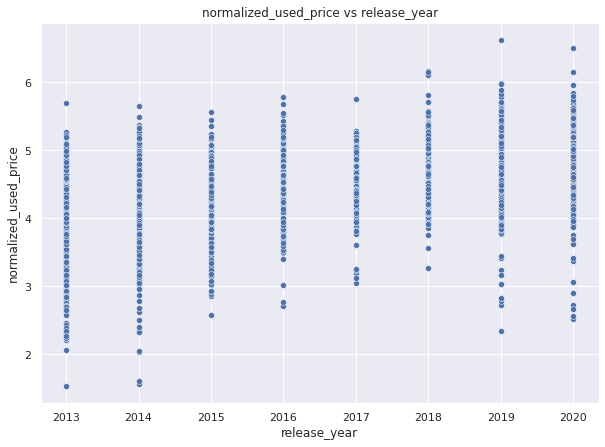

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="release_year", y="normalized_used_price");
plt.title('normalized_used_price vs release_year')
plt.show()

**Observation:**

There seems to be increament in normalized_used_price as release year increases.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
#checking info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Converting object data type columns to categorical data types.

In [ ]:
#converting object data type columns to category
#df1["brand_name"] = df1["brand_name"].astype("category")
df1["os"] = df1["os"].astype("category")
df1["4g"] = df1["4g"].astype("category")
df1["5g"] = df1["5g"].astype("category")

In [ ]:
#dataset info after onversion
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   object  
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

Checking for null values

In [ ]:
#Checking number of null values in columns and displaying in decending order
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Below are the columns with missing values that have to be addressed

 > main_camera_mp      -      179 missing values

 > weight           -          7 missing values

 > battery          -          6 missing values

 > int_memory       -          4 missing values

 > ram              -         4 missing values

 > selfie_camera_mp     -      2 missing values

The missing values in each column will be replaced with its median value

In [ ]:
#Replacing missing values in each columns with median values.
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
df1[numeric_columns] = df1[numeric_columns].apply(medianFiller, axis=0)

In [ ]:
#Checking the missing values again after replacing with median value
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All missing values have been treated

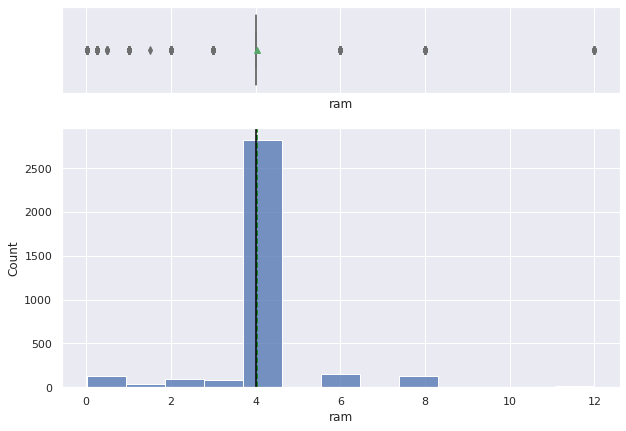

In [ ]:
histogram_boxplot(df1, "ram")

We can drop column "RAM" as majority of dataset has 4GB ram with a few upper and lower outliers.

In [ ]:
#Deleting column
df1.drop("ram", axis=1, inplace=True)
numeric_columns.remove("ram")

### Feature Engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
#Calculating years since release
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check

Checking for outliers in the given dataset

In [ ]:
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price',
 'years_since_release']

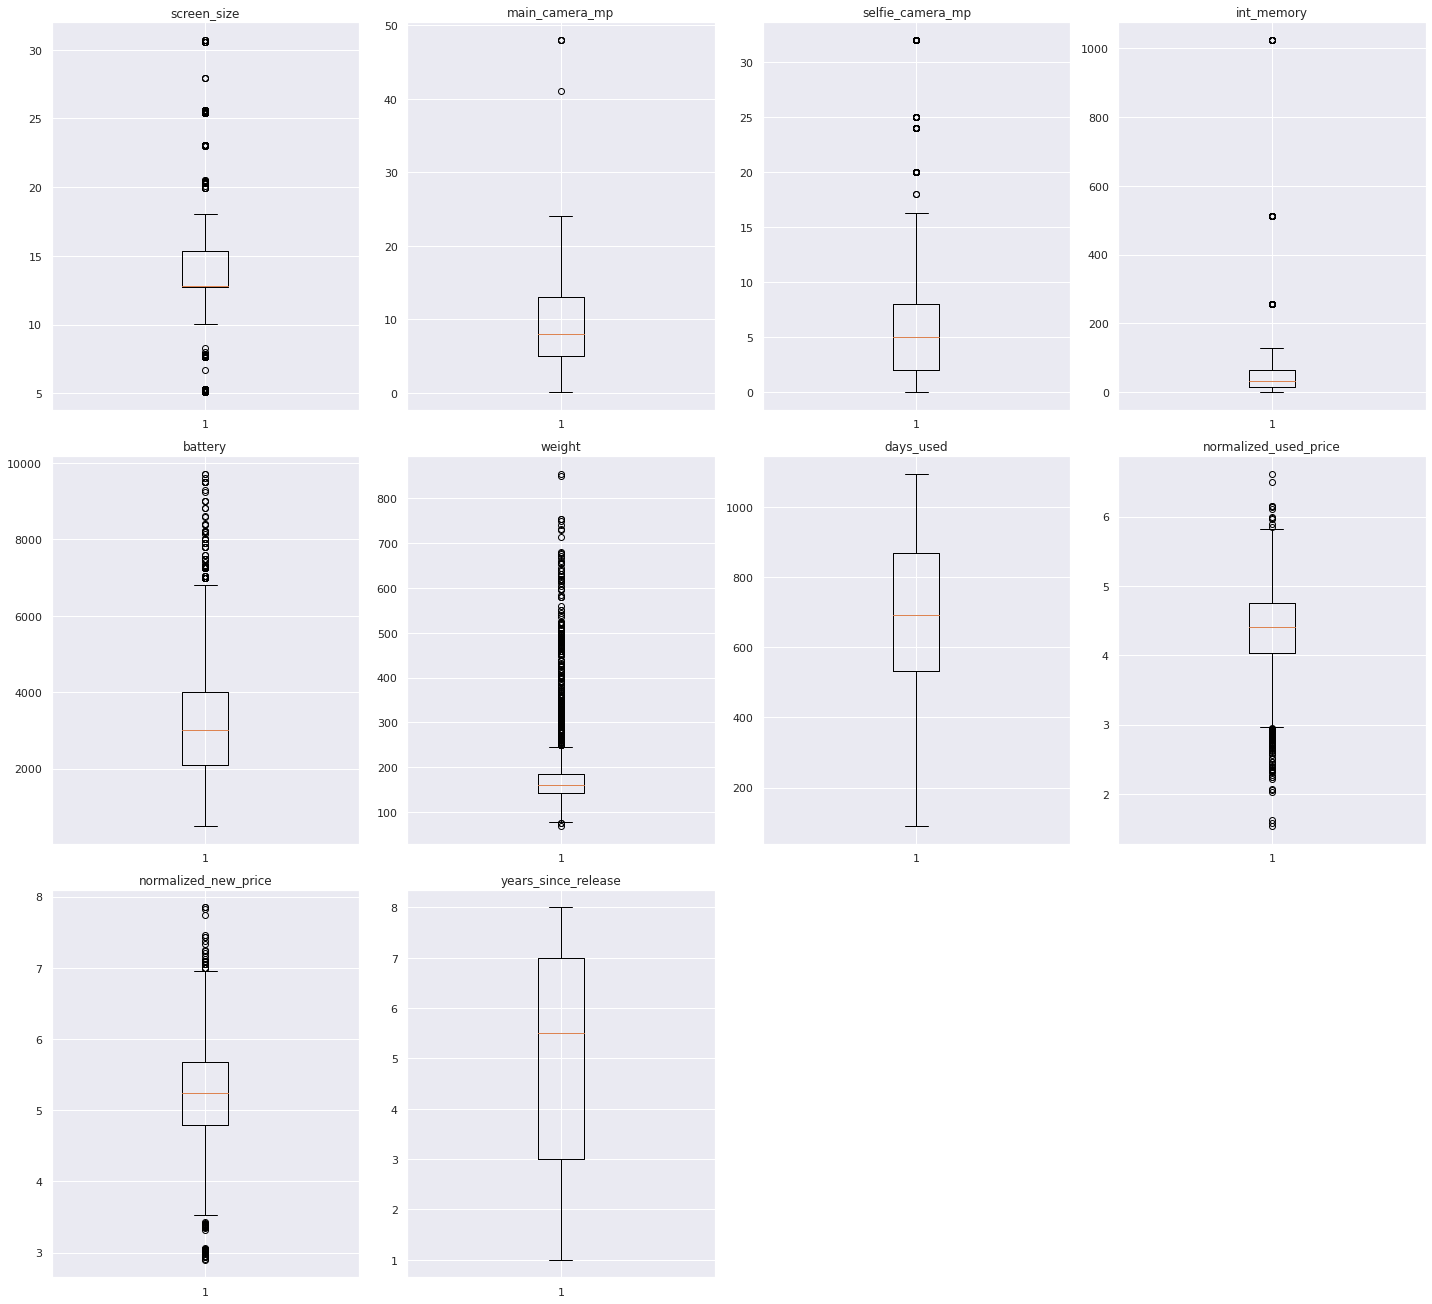

In [ ]:
# outlier detection using boxplot

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
 * **screen_size,ram, weight, normalized_used_price, normalized_new_price** - have outliers at both lower and upper sides
 * **main_camera_mp, selfie_camera_mp, int_memory, battery** - have upper outliers
 * **days_used & year_since_release** have no outliers.
 

  Outliers can have a dramatic impact on linear regression. It can change the model equation completely i.e. bad prediction or estimation. 
  
  But at the same time, if there are some outliers statistically that does not mean it is not relevant. Here in the above diagrams, we can observe that there are many outliers for important physical features like weight, screen size, battery etc.

  In given dataset , avg screen size is 13.7 cm and max is 30.7. Avg weight is 182.75 and max weight is 855. While it is practically impossible for a phone to have screen size as 31 cm and weigh as heavy as 855 gm but it is totally justified and normal for a tablet. If we remove all these high values, we will be missing out significant data for tablets.

   While analyzing the dataset, we need to keep in mind that the dataset given is for both phones and tablets. In reality phones and tablets are physically and statistically very much different. Tablets are having bigger screens, bigger battery and they weigh more than phones.
   
   *So, the extreme values are justfied and part of the natural dataset. These features are very strongly correlated also. So, if we remove outliers that will not reflect a correct correlations.*

  **Hence, we are deciding not to remove the outliers**

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
df1['brand_name'].describe()

count       3454
unique        34
top       Others
freq         502
Name: brand_name, dtype: object

In [ ]:
df1['normalized_new_price'].describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

brand_name is a categorical variable and there are 34 different brands.
We will now divide the 34 manufacturing brands into 3 categories on the average price of a new phone. This will help us to create less number of dummy variables avoiding too many dummy variables for feature brand name. 


In [ ]:
# by that manufacturing brand i.e. 
# low_range  : <€4.5
# mid_range  : €4.5-5.5
# high_range : >€5.5

df1.groupby("brand_name").mean()["normalized_new_price"].sort_values()

brand_name
Celkon        4.018319
Spice         4.453086
Micromax      4.513854
Karbonn       4.582536
Lava          4.586627
Infinix       4.655516
Nokia         4.668024
Alcatel       4.804302
XOLO          4.822616
Microsoft     4.963936
Panasonic     5.020892
Others        5.051192
Acer          5.077328
Realme        5.082650
Lenovo        5.138462
Coolpad       5.169676
Motorola      5.191796
ZTE           5.218665
LG            5.286666
BlackBerry    5.304419
Gionee        5.334537
Honor         5.349602
Xiaomi        5.364574
Asus          5.387590
HTC           5.452407
Meizu         5.462516
Samsung       5.482891
Huawei        5.515084
Sony          5.549278
Vivo          5.638037
Oppo          5.679682
Google        6.077932
OnePlus       6.266780
Apple         6.339548
Name: normalized_new_price, dtype: float64

In [ ]:
df1.loc[df1.normalized_new_price >0, "brand_name"] = "low_range"
df1.loc[df1.normalized_new_price>=4.5, "brand_name"] = "mid_range"
df1.loc[df1.normalized_new_price>=5.5, "brand_name"] = "high_range"

df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,mid_range,Android,14.50,yes,no,13.0,5.0,64.0,3020.0,146.0,127,4.307572,4.715100,1
1,high_range,Android,17.30,yes,yes,13.0,16.0,128.0,4300.0,213.0,325,5.162097,5.519018,1
2,high_range,Android,16.69,yes,yes,13.0,8.0,128.0,4200.0,213.0,162,5.111084,5.884631,1
3,high_range,Android,25.50,yes,yes,13.0,8.0,64.0,7250.0,480.0,345,5.135387,5.630961,1
4,mid_range,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,293,4.389995,4.947837,1


In [ ]:
# defining X and y variables
X = df1.drop(["normalized_used_price", 'years_since_release'], axis=1) # since year is a temporal variable
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

   brand_name       os  screen_size   4g   5g  main_camera_mp  \
0   mid_range  Android        14.50  yes   no            13.0   
1  high_range  Android        17.30  yes  yes            13.0   
2  high_range  Android        16.69  yes  yes            13.0   
3  high_range  Android        25.50  yes  yes            13.0   
4   mid_range  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0        127   
1              16.0       128.0   4300.0   213.0        325   
2               8.0       128.0   4200.0   213.0        162   
3               8.0        64.0   7250.0   480.0        345   
4               8.0        64.0   5000.0   185.0        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name

###Creating dummy variable for independent features

In [ ]:
# creating dummy variables for independent features
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) 
print(X.shape)
X.head()

(3454, 15)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_low_range,brand_name_mid_range,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127,4.715100,0,1,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325,5.519018,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162,5.884631,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,7250.0,480.0,345,5.630961,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293,4.947837,0,1,0,0,0,1,0


In [ ]:
#To suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of rows in train data set :", x_train.shape[0])
print("Number of rows in test data set:", x_test.shape[0])

Number of rows in train data set : 2417
Number of rows in test data set: 1037


## Model Building - Linear Regression

### **Building a Linear Regression model**
We want to predict the price for a used phone.

 - Before we proceed to build a model, we'll have to encode categorical features.

 - We'll split the data into train and test to be able to evaluate the model that we build on the train data.

 - We will build a Linear Regression model using the train data and then check it's performance.

In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     855.0
Date:                   Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                           23:17:43   Log-Likelihood:                 73.695
No. Observations:                   2417   AIC:                            -115.4
Df Residuals:                       2401   BIC:                            -22.75
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**

* Negative values of the coefficient show that normalized_used_price decreases with the increase of corresponding attribute value
* Positive values of the coefficient show that normalized_used_price increases with the increase of corresponding attribute value

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant But these variables might contain multicollinearity, which will affect the p-values. So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values

### Interpreting the Regression Results:

1. **R-squared & Adjusted. R-squared**: It reflects the fit of the model.
    - In our case, the value for R-squared is **0.845**, which is good.
    - In our case, the value for adj. R-squared is **0.844**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.1319**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - E.g. In our case, the coefficient of `screen_size` is **0.0278**.

**Let's check the coefficients and intercept of the model.**

In [ ]:
print('Coefficients of the model:\n')
round(olsmodel1.params,4)


Coefficients of the model:



const                   1.0116
screen_size             0.0314
main_camera_mp          0.0223
selfie_camera_mp        0.0164
int_memory              0.0001
battery                -0.0000
weight                  0.0006
days_used              -0.0001
normalized_new_price    0.4617
brand_name_low_range    0.0875
brand_name_mid_range    0.0977
os_Others              -0.0397
os_Windows              0.0364
os_iOS                 -0.0017
4g_yes                  0.0777
5g_yes                  0.0645
dtype: float64

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234704,0.183163,0.842314,0.841263,4.422737


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235229,0.188348,0.837513,0.834965,4.509361


**Observation:**

* The training R-Sqd is 0.84, tells that the model explains approx. 84% of the variation in the train data. We can say that the model is not underfitting
* MAE (0.182, 0.186) and RMSE (0.232, 0.233) of the train and test sets shows that the model is not overfitting
* MAE indicates that current model is able to predict normalized_used_price within a mean error of 0.18 on the test data
* MAPE on the test set suggests we can predict within 4.4% of normalized_used_price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY


- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,396.426047
1,screen_size,7.655366
2,main_camera_mp,2.003979
3,selfie_camera_mp,2.179018
4,int_memory,1.246879
5,battery,3.759334
6,weight,5.983966
7,days_used,1.747194
8,normalized_new_price,5.546775
9,brand_name_low_range,4.822539


 Features with VIF > 5  : screen_size, weight and normalized_new_price

### Removing Multicollinearity


To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size','weight','normalized_new_price'] # specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) #Check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.839931,0.236520
1,screen_size,0.835921,0.239464
2,normalized_new_price,0.788523,0.271860


Checking VIF after dropping 'weight'

In [ ]:
col_to_drop = 'weight' #the column to drop
x_train1 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] #train data from which to drop the column specified
x_test1 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] #test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,379.577046
1,screen_size,3.476869
2,main_camera_mp,1.932223
3,selfie_camera_mp,2.074100
4,int_memory,1.246406
5,battery,3.529557
6,days_used,1.663083
7,normalized_new_price,5.529081
8,brand_name_low_range,4.817447
9,brand_name_mid_range,3.143267


Let's check the model performance

In [ ]:
olsmod2 = sm.OLS(y_train, x_train1).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     906.5
Date:                   Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                           23:17:43   Log-Likelihood:                 62.593
No. Observations:                   2417   AIC:                            -95.19
Df Residuals:                       2402   BIC:                            -8.331
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Both R-sqrd and Adj R-sqrd decreased by very significantly by 0.01. 

As there is no multicollinearity, we will check p-values of predictor variables to check their significance.

* int_memory, battery, days_used, os_others , os_windows,os_iOS, 5g_yes have p-value > 0.05. 
So, they are not significant and we can drop and them check the model again

In [ ]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'days_used', 'normalized_new_price', 'brand_name_low_range', 'brand_name_mid_range', '4g_yes', '5g_yes']


In [ ]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [ ]:
olsmod3 = sm.OLS(y_train, x_train2).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1409.
Date:                   Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                           23:17:44   Log-Likelihood:                 59.704
No. Observations:                   2417   AIC:                            -99.41
Df Residuals:                       2407   BIC:                            -41.51
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

After dropping all column with p-value >0.5 , R-squared, Adj R-squared both decreased by 0.01 which is not a very sharp drop. 
This indicates that the variables we dropped were not affecting the model much.

##TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.374907,-0.112932
3141,4.175156,3.785307,0.389849
1233,4.117410,4.404625,-0.287215
3046,3.782597,3.861366,-0.078769
2649,3.981922,3.973354,0.008568


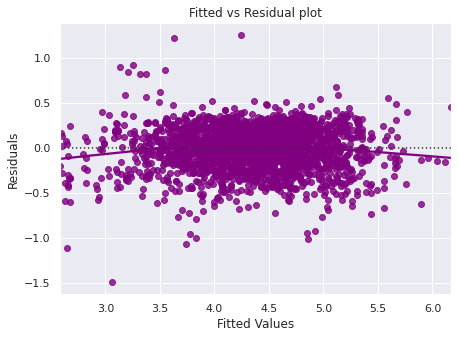

In [ ]:
# let's plot the fitted values vs residuals
plt.figure(figsize=(7,5))
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


**Observations:**

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* Here, we do not observe any pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

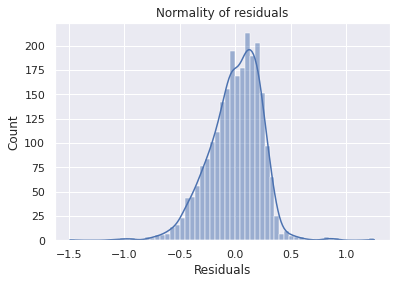

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals have almost bell shape.
- Let's check the Q-Q plot.

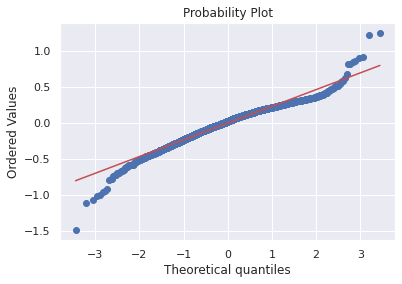

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

(0.9683705568313599, 1.190247596402629e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 0.9516727327319164), ('p-value', 0.8043287284140699)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod3.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1174,94.430815,87.496268
2247,81.238798,70.957353
2991,73.078043,63.617695
2997,79.009214,70.840088
2982,100.529127,88.635667
479,78.660741,74.645874
17,109.011245,108.509892
471,105.280149,91.778909
2918,90.069046,87.514283
602,57.177211,75.608310


* We can conclude that the model has returned good prediction results, and the actual and predicted (normalized_used_price) are comparable, although there is further scope for improvement

* Below is the comparison result shown as bar graph

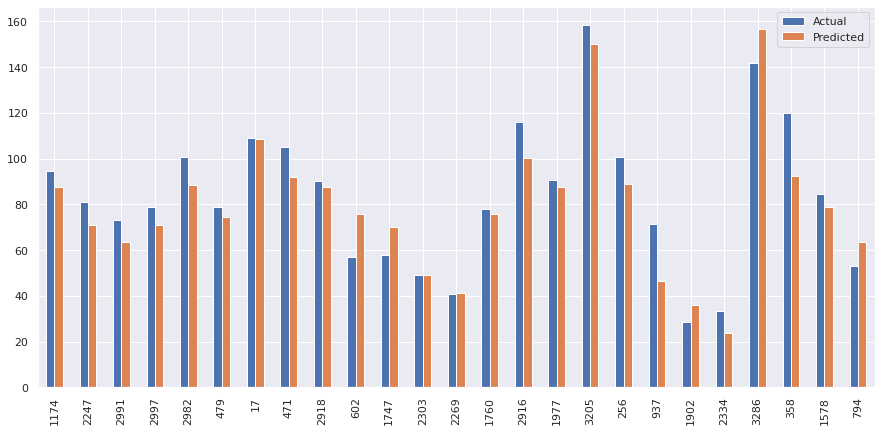

In [ ]:
df2 = df_pred_test.sample(25, random_state=1)
df2.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model

In [ ]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [ ]:
#fit the final model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1409.
Date:                   Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                           23:17:46   Log-Likelihood:                 59.704
No. Observations:                   2417   AIC:                            -99.41
Df Residuals:                       2407   BIC:                            -41.51
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Final Model Summary

 - *screen_size* is statistically significant, it has a strong positive correlation. So, if the screen size of a used phone increases used price also goes up.
 - *main_camera_mp & selfie_camera_mp* both are positively correlated. Used price goes up as mega pixel of the camera goes up.
 - *days_used* has a negative correlation with used price. The more number of days phone/tablet has been used , the price is decreased.
 - *normalized_new_price* is positively correlated. So as a used phone's original price increases, used price also increases.
 - If the device is 4g or 5g enabled , that also positively correlated with used price of the device.
 - Preliminary EDA shows moderate positive correlation between weight of the phone/tablet and battery. However, weight and battery have been found to be not significant factors in predicting normlized used price. 
 - RAM for the refurbished phones/tablets was found to be constant ~4GB on average across the dataset, and also insignificant. 
 - Almost 93% of refubrished phone/tablet are having os as Android but not a significant factor for prediction

 
 - The linear predictive model is able to predict the normalized_used_price of the phone/tablet, explaining ~84% of the variance in the data. The model is hence good
 - All of the assumptions for linear regression were met for the model - multicollinearity or predictor VIFs < 5, normality of error terms and homoscedasticity. While the independence and linearity assumption can be assumed met after suitable transformation/data preprocessing, the data gave the impression that non-linear models may be more suited for prediction




### Model Performance

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmod_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236067,0.183695,0.840478,0.839815,4.426364


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmod_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238359,0.190351,0.83316,0.831534,4.552246


* The model is able to explain **~84%**of the variation in the data which is good

* The train and test **RMSE** and **MAE** (0.23, 0.18) are low and comparable. So, our model is not suffering from overfitting

* The **MAPE** on the test set suggests we can predict within 4.5 % of the normalized used price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

## Insights

* We have observed from analysis that price of used phone or tablet goes up if the screen size is bigger. The given dataset has 1099 phones/tablets which is 32% with screen size > 6 inches but majority customer (68%) buys phones with < 6 inches screen.

* Normalized used price of phone/tablet increases as mega pixel of main or selfie camera goes up. There are total 655 phones with selfie camera with more than 8 megapixel lense.

* Used phones/tablets which are 4g or 5g enabled are more costly than which are not. Even though, avegrage cost of a 5g enabled device is more than the 4g enabled one but 95.5 % used phones are not 5g enabled.

* We observe that the normalized used price goes up for newer models of refubrished phones/tablets but we see that the number/percentage of phones released in recent years are quite less.

* Number of Anodroid phones or tablets are more than other os.

* We can conclude that the number of days a phone/tablet has been used depreciates the new price.


### Recommendations

**Suggestion 1:** There are few top brands like Samsung, Huwaei, LG which are in high demands. ReCell has to increase supply for these brands and also need to arrange some marketing campaign or advertisement to encourage customers to buy these brands.

**Suggestion 2:** ReCell should focus to increase frequency of customers buying a phone or tablet with large screen. Launching an ad campaign to encourage customer to buy a bigger screen size phone and promoting some offer fo phone/tablet with large screen would help.

**Suggestion 3:** ReCell should get more supply of used phones with high megapixels in the selfie and main camera.

**Suggestion 4:**The relationship between new price and days used of a phone is depreciation. So, increasing the supply of phones/tablets with newer models and promoting advertisements/offers encouraging customers to buy a newer phone model would be helpful.

**Suggestion 5:** Customers want 4g and 5g enabled phones/tablets more and average price of used 5g phone is higher. But more than 95% phones/tablets are not 5g enabled. If ReCell focus to add more 5g phones/tablets in their stock and encourage customer to switch to 5g that would help to increase their sale and profit.



___